In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

D:\Anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.2)


Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.6921 - loss: 0.8373 - val_accuracy: 0.8437 - val_loss: 0.4298
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8586 - loss: 0.3826 - val_accuracy: 0.8690 - val_loss: 0.3640
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8837 - loss: 0.3195 - val_accuracy: 0.8857 - val_loss: 0.3157
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8950 - loss: 0.2818 - val_accuracy: 0.8911 - val_loss: 0.2962
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9065 - loss: 0.2527 - val_accuracy: 0.8930 - val_loss: 0.2852
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9132 - loss: 0.2361 - val_accuracy: 0.9037 - val_loss: 0.2711
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9189 - loss: 0.2164 - val_accuracy: 0.8996 - val_loss: 0.2868
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9245 - loss: 0.2017 - 

In [7]:
# Select random images from the test set
num_samples = 5
random_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

In [8]:
# Make predictions on the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [9]:
# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

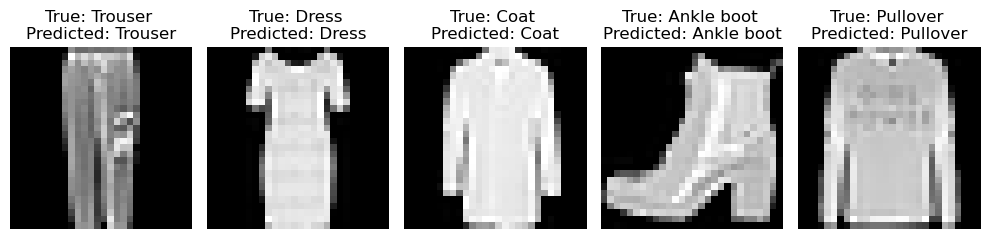

In [10]:
# Show images with their predicted and true labels
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_labels[np.argmax(sample_labels[i])]} \nPredicted: {class_labels[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
# Save the model
model.save('my_cnn_model.h5')

In [12]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_cnn_model.h5')

In [14]:
import tkinter as tk
from tkinter import ttk, filedialog
from PIL import ImageTk, Image
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('my_cnn_model.h5')

# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def predict_image():
    # Allow user to select an image file
    file_path = filedialog.askopenfilename()
    if not file_path:
        return
    
    # Load and preprocess the image
    img = Image.open(file_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))
    img = np.array(img) / 255.0
    img = img.reshape((1, 28, 28, 1))
# Make predictions on the image
    prediction = model.predict(img)
    predicted_label = class_labels[np.argmax(prediction)]

    # Display the image and predicted label
    img = Image.open(file_path)
    img = img.resize((200, 200))
    img = ImageTk.PhotoImage(img)
    image_label.config(image=img)
    image_label.image = img
    status_label.config(text=f"Predicted Label: {predicted_label}")

# Create the main application window
root = tk.Tk()
root.title("Fashion MNIST Image Classifier")

# Add a button to upload an image and predict
upload_button = ttk.Button(root, text="Upload Image", command=predict_image)
upload_button.grid(row=0, column=0, columnspan=3)

# Add labels for displaying image and prediction information
image_label = ttk.Label(root)
image_label.grid(row=1, column=0, columnspan=3)

status_label = ttk.Label(root, text="")
status_label.grid(row=2, column=0, columnspan=3)


# Run the application loop
root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
